gazelle {'cap': {'type': 'protected', 'label': 'P'}, 'dock': {'type': 'fluid', 'label': 'U'}, 'box': {'type': 'fluid', 'label': 'U'}, 'star': {'type': 'non-penetrative', 'label': 'L'}}
dock {'gazelle': {'type': 'fluid', 'label': 'U'}, 'cat': {'type': 'fluid', 'label': 'U'}}
cat {'dock': {'type': 'fluid', 'label': 'U'}}
fish {'boat': {'type': 'unknown', 'label': '?'}, 'box': {'type': 'protected', 'label': 'P'}}
star {'glitter': {'type': 'fluid', 'label': 'U'}}


(-0.9199194358256723,
 0.8372584069236314,
 -1.1993699697192544,
 1.098131586093105)

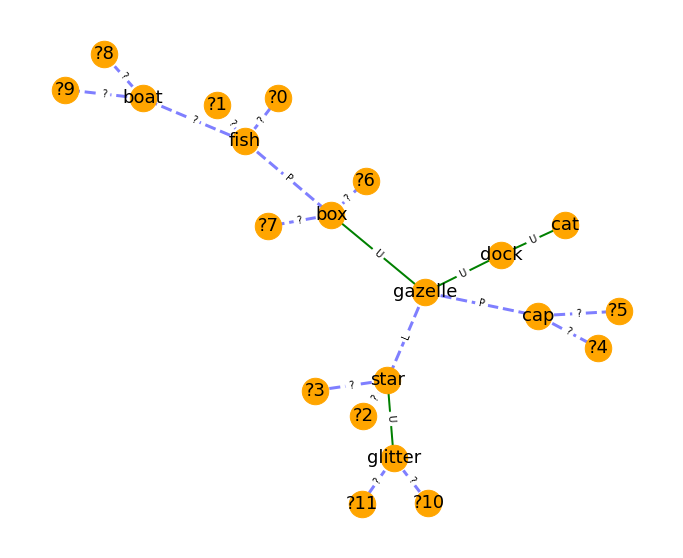

In [53]:
import matplotlib.pyplot as plt

import networkx as nx

FLUID = {"type": "fluid", "label": "U"}
PROTECTED = {"type": "protected", "label": "P"}
MYSTERY = {"type": "unknown", "label": "?"}

DEFAULT_UNKNOWNS = 2
people_dict = {
    "gazelle":{
        "connections": {
            "cap": PROTECTED,
            "dock": FLUID,
            "box": FLUID,
            "star": {"type": "non-penetrative", "label":"L"},
        },
        "unknowns": 0
    },
    "dock": {
        "connections": {
            "gazelle": FLUID,
            "cat": FLUID
        },
        "unknowns": 0
    },
    "cat":{
        "connections":{
            "dock": FLUID,
        },
        "unknowns": 0
    },
    "fish":{
        "connections":{
            "boat": MYSTERY,
            "box": PROTECTED,
        },
    },
    "star": {
        "connections": {
            "glitter": FLUID,
        },
    }
}

g_dict = {}
for name in people_dict:
    print(name, people_dict[name]["connections"])
    g_dict[name] = people_dict[name]["connections"]

plt.figure(figsize=(12, 10))

graph = nx.Graph(g_dict)

# === add possible unknown rando partners
rando_counter = 0
original_nodes = list(graph.nodes)
for node in original_nodes:
    for i in range(people_dict.get(node, {}).get("unknowns", DEFAULT_UNKNOWNS)):
        graph.add_edge(node, f"?{rando_counter}", **MYSTERY)
        # g_dict[name][f"?{rando_counter}"] = MYSTERY
        rando_counter += 1

pos = nx.spring_layout(graph)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='orange')
 
# Draw edges
elarge = [(u, v) for (u, v, d) in graph.edges(data=True) if d['type'] == "fluid"]
esmall = [(u, v) for (u, v, d) in graph.edges(data=True) if d['type'] != "fluid"]

nx.draw_networkx_edges(graph,pos,edgelist=elarge, width=2, edge_color='g')
nx.draw_networkx_edges(graph,pos,edgelist=esmall, arrows=False, width=3,
                       alpha=0.5,edge_color='b',style='dashed')
 
# Draw node labels
nx.draw_networkx_labels(graph,pos,font_size=18,font_family='sans-serif')
 
# Draw edge labels
edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in graph.edges(data=True)])
 
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
 
plt.axis('off')


In [32]:
g_dict

{'gazelle': {'glitter': {'type': 'fluid', 'label': 'U'}}}